In [14]:
import numpy as np
from sklearn.datasets import load_iris

# Load iris dataset
iris = load_iris()
X = iris.data

# Normalize the data
X_normalized = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

# Calculate entropy of each attribute
def entropy(x):
    probabilities = np.bincount(x.astype('int64')) / len(x)
    entropy = -np.sum([p * np.log2(p) for p in probabilities if p > 0])
    return entropy

entropies = np.apply_along_axis(entropy, 0, X_normalized)

# Calculate weights using entropy
weights = (1 - entropies / np.sum(entropies))

# Normalize weights
weights /= np.sum(weights)

print("Entropy weights for iris dataset attributes:")
for i, attribute in enumerate(iris.feature_names):
    print(f"{attribute}: {weights[i]}")
type(X)

Entropy weights for iris dataset attributes:
sepal length (cm): 0.27214881945205116
sepal width (cm): 0.27214881945205116
petal length (cm): 0.27214881945205116
petal width (cm): 0.1835535416438465


numpy.ndarray

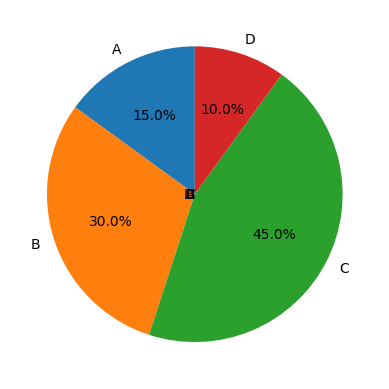

In [3]:
import matplotlib.pyplot as plt

# 数据
labels = ['A', 'B', 'C', 'D']
sizes = [15, 30, 45, 10]

# 创建饼图
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# 标注文本在圆外
for i, text in enumerate(texts):
    angle = wedges[i].theta2 + wedges[i].theta1
    x = 1.1 * wedges[i].center[0]  # 文本位置的 x 坐标
    y = 1.1 * wedges[i].center[1]  # 文本位置的 y 坐标
    horizontal_alignment = 'left' if x > 0 else 'right'  # 根据文本位置确定水平对齐方式
    ax.text(x, y, labels[i], horizontalalignment=horizontal_alignment, verticalalignment='center')
plt.show()


In [6]:
import numpy as np
from sklearn.datasets import load_iris

# Load iris dataset
iris = load_iris()
X = iris.data

# Calculate coefficient of variation for each attribute
coeff_var = np.std(X, axis=0) / np.mean(X, axis=0)

# Calculate weights using coefficient of variation
weights1 = 1 / coeff_var
weights1 /= np.sum(weights1)

print("Weights for iris dataset attributes using coefficient of variation method:")
for i, attribute in enumerate(iris.feature_names):
    print(f"{attribute}: {weights1[i]}")


Weights for iris dataset attributes using coefficient of variation method:
sepal length (cm): 0.3970351732351761
sepal width (cm): 0.3946597676128664
petal length (cm): 0.11977661366931963
petal width (cm): 0.08852844548263775


In [12]:
#new 指标：
import numpy as np
def sqrt_weight (x,y):
    return np.sqrt(x*y)
weight=np.apply_along_axis(sqrt_weight,0,weights,weights1)
weight/=np.sum(weight)
print("Weights for iris dataset attributes using sqrt_weight method:")
for i, attribute in enumerate(iris.feature_names):
    print(f"{attribute}: {weight[i]}")

Weights for iris dataset attributes using sqrt_weight method:
sepal length (cm): 0.3408254145983721
sepal width (cm): 0.3398043297860039
petal length (cm): 0.1871989876080865
petal width (cm): 0.1321712680075376


In [13]:
import numpy as np
from sklearn.datasets import load_iris

# Load iris dataset
iris = load_iris()
X = iris.data

# Define pairwise comparison matrix
comparison_matrix = np.array([
    [1, 1/3, 3, 3],
    [3, 1, 5, 5],
    [1/3, 1/5, 1, 1],
    [1/3, 1/5, 1, 1]
])

# Calculate the geometric mean of each row
geometric_mean = np.prod(comparison_matrix, axis=1) ** (1 / len(comparison_matrix))

# Normalize the matrix
normalized_matrix = comparison_matrix / geometric_mean.reshape(-1, 1)

# Calculate the eigenvector of the normalized matrix
eigenvalues, eigenvectors = np.linalg.eig(normalized_matrix)
max_eigenvalue_index = np.argmax(eigenvalues)
eigenvector = eigenvectors[:, max_eigenvalue_index]
eigenvector /= np.sum(eigenvector)

# Calculate the consistency index
n = len(eigenvector)
lambda_max = max(eigenvalues)
consistency_index = (lambda_max - n) / (n - 1)

# Calculate the consistency ratio
random_index = {1: 0, 2: 0, 3: 0.58, 4: 0.90, 5: 1.12, 6: 1.24, 7: 1.32, 8: 1.41, 9: 1.45}
random_eigenvalue = random_index[n]
consistency_ratio = consistency_index / random_eigenvalue

print("Pairwise Comparison Matrix:")
print(comparison_matrix)
print("\nNormalized Matrix:")
print(normalized_matrix)
print("\nEigenvector:")
print(eigenvector)
print("\nConsistency Index:", consistency_index)
print("Consistency Ratio:", consistency_ratio)


Pairwise Comparison Matrix:
[[1.         0.33333333 3.         3.        ]
 [3.         1.         5.         5.        ]
 [0.33333333 0.2        1.         1.        ]
 [0.33333333 0.2        1.         1.        ]]

Normalized Matrix:
[[0.75983569 0.25327856 2.27950706 2.27950706]
 [1.01942655 0.33980885 1.69904424 1.69904424]
 [0.65599656 0.39359793 1.96798967 1.96798967]
 [0.65599656 0.39359793 1.96798967 1.96798967]]

Eigenvector:
[0.27418718+0.j 0.23602667+0.j 0.24489308+0.j 0.24489308+0.j]

Consistency Index: (0.3499312653103817+0j)
Consistency Ratio: (0.38881251701153524+0j)


In [15]:
import pandas as pd
df=pd.read_csv('apple_quality.csv')

C:\Users\Baijy\AppData\Local\Temp\ipykernel_14772\2638655768.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [23]:
df.head()
df.describe()
import pandas as pd
import numpy as np

import pandas as pd
import numpy as np

def entropy(series):
    # 计算给定列的信息熵
    p = series.value_counts() / len(series)
    return -np.sum(p * np.log2(p))

def entropy_weight(df):
    # 选择数字列
    numeric_cols = df.select_dtypes(include=[np.number])

    # 计算每列的信息熵
    entropies = numeric_cols.apply(entropy)

    # 计算每列的权重
    weights = (1 - entropies / np.sum(entropies))

    return weights

# 示例DataFrame
# 计算权重
weights = entropy_weight(df)
print("各列权重:")
print(weights)



各列权重:
A_id           0.857143
Size           0.857143
Weight         0.857143
Sweetness      0.857143
Crunchiness    0.857143
Juiciness      0.857143
Ripeness       0.857143
dtype: float64


In [24]:
import pandas as pd
import numpy as np

def coefficient_of_variation(series):
    # 计算给定列的变异系数
    std = series.std()
    mean = series.mean()
    return (std / mean) * 100

def cv_weight(df):
    # 选择数字列
    numeric_cols = df.select_dtypes(include=[np.number])
    # 计算每列的变异系数
    cvs = numeric_cols.apply(coefficient_of_variation)
    # 计算每列的权重
    weights = 1 / cvs
    # 标准化权重
    weights = weights / weights.sum()
    return weights



# 计算权重
weights = cv_weight(df)
print("各列权重:")
print(weights)


各列权重:
A_id           0.938637
Size          -0.141436
Weight        -0.334762
Sweetness     -0.131241
Crunchiness    0.380859
Juiciness      0.143830
Ripeness       0.144113
dtype: float64


           x         y
0   1.000000  2.000000
1   1.040404  2.022403
2   1.080808  2.046322
3   1.121212  2.071757
4   1.161616  2.098707
..       ...       ...
95  4.838384  5.617240
96  4.878788  5.707858
97  4.919192  5.801857
98  4.959596  5.899238
99  5.000000  6.000000

[100 rows x 2 columns]


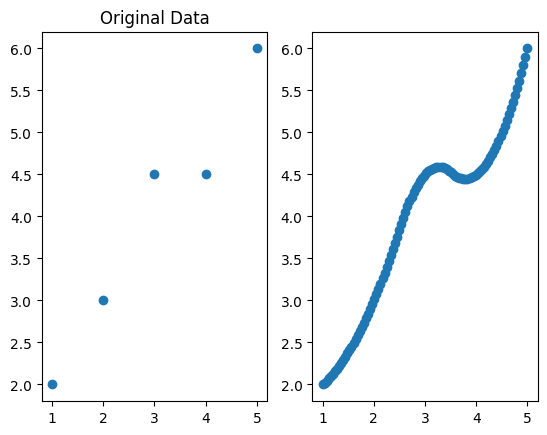

In [29]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d

# 创建示例数据
data = {
    'x': [1, 2, 3, 4, 5],
    'y': [2, 3, 4.5, 4.5, 6]
}
df = pd.DataFrame(data)

# 进行多项式回归插值
poly_interp = interp1d(df['x'], df['y'], kind='quadratic')

# 生成插值后的 x 值
new_x = np.linspace(df['x'].min(), df['x'].max(), 100)

# 计算插值后的 y 值
new_y = poly_interp(new_x)

# 创建新的 DataFrame 存储插值结果
interpolated_df = pd.DataFrame({'x': new_x, 'y': new_y})

print(interpolated_df)
import matplotlib.pyplot as plt
plt.subplot(1, 2, 1)
plt.scatter(df['x'], df['y'])
plt.title('Original Data')
plt.subplot(1, 2, 2)
plt.scatter(interpolated_df['x'], interpolated_df['y'])
